Simulate data from the cell2fate model:

In [1]:
from typing import Optional
import numpy as np
import pandas as pd
import pyro
import pyro.distributions as dist
import torch
from pyro.nn import PyroModule
from scvi import REGISTRY_KEYS
import pandas as pd
from scvi.nn import one_hot
from cell2fate.utils import G_a, G_b, mu_mRNA_continousAlpha_globalTime_twoStates
from pyro.infer import config_enumerate
from pyro.ops.indexing import Vindex
from torch.distributions import constraints
import matplotlib.pyplot as plt

Global seed set to 0


Use parameters from dentate gyrus datasets as starting point:

In [2]:
import pickle
with open('/nfs/team283/aa16/data/fate_benchmarking/' + 'DentateGyrusPosterior.pickle', 'rb') as handle:
    true_posterior = pickle.load(handle)

Multiply splicing rates with various factors and save results:

In [3]:
multiplication_factor = np.array((1., 0.25, 0.5, 2., 4.))
correlation_list1 = []
correlation_list2 = []
for i in range(len(multiplication_factor)):
    print(i)
    with open('/nfs/team283/aa16/data/fate_benchmarking/SimulatedData/cell2fatePosterior_Beta' + str(multiplication_factor[i]) + '.pickle', 'rb') as handle:
        posterior = pickle.load(handle)
    correlation_list1 += [np.round(np.corrcoef(posterior['beta_g'][0,:], true_posterior['beta_g'][0,:])[0,1],2)]
    correlation_list2 += [np.round(np.corrcoef(posterior['gamma_g'][0,:], true_posterior['gamma_g'][0,:])[0,1],2)]
correlation_list1 = np.array(correlation_list1)[np.argsort(multiplication_factor)]
correlation_list2 = np.array(correlation_list2)[np.argsort(multiplication_factor)]
multiplication_factor = multiplication_factor[np.argsort(multiplication_factor)]

0
1
2
3
4


In [4]:
multiplication_factor = np.array((1., 0.25, 0.5, 2., 4.))
correlation_list3 = []
correlation_list4 = []
for i in range(len(multiplication_factor)):
    print(i)
    with open('/nfs/team283/aa16/data/fate_benchmarking/SimulatedData/cell2fatePosterior_Gamma' + str(multiplication_factor[i]) + '.pickle', 'rb') as handle:
        posterior = pickle.load(handle)
    correlation_list3 += [np.round(np.corrcoef(posterior['beta_g'][0,:], true_posterior['beta_g'][0,:])[0,1],2)]
    correlation_list4 += [np.round(np.corrcoef(posterior['gamma_g'][0,:], true_posterior['gamma_g'][0,:])[0,1],2)]
correlation_list3 = np.array(correlation_list3)[np.argsort(multiplication_factor)]
correlation_list4 = np.array(correlation_list4)[np.argsort(multiplication_factor)]
multiplication_factor = multiplication_factor[np.argsort(multiplication_factor)]

0
1
2
3
4


In [5]:
multiplication_factor = np.array((1., 0.25, 0.5, 2., 4.))
correlation_list5 = []
correlation_list6 = []
for i in range(len(multiplication_factor)):
    print(i)
    with open('/nfs/team283/aa16/data/fate_benchmarking/SimulatedData/cell2fatePosterior_Overdispersion' + str(multiplication_factor[i]) + '.pickle', 'rb') as handle:
        posterior = pickle.load(handle)
    correlation_list5 += [np.round(np.corrcoef(posterior['beta_g'][0,:], true_posterior['beta_g'][0,:])[0,1],2)]
    correlation_list6 += [np.round(np.corrcoef(posterior['gamma_g'][0,:], true_posterior['gamma_g'][0,:])[0,1],2)]
correlation_list5 = np.array(correlation_list5)[np.argsort(multiplication_factor)]
correlation_list6 = np.array(correlation_list6)[np.argsort(multiplication_factor)]
multiplication_factor = multiplication_factor[np.argsort(multiplication_factor)]

0
1
2
3
4


In [6]:
multiplication_factor = np.array((1., 0.25, 0.5, 2., 4.))
correlation_list7 = []
correlation_list8 = []
for i in range(len(multiplication_factor)):
    print(i)
    with open('/nfs/team283/aa16/data/fate_benchmarking/SimulatedData/cell2fatePosterior_DetectionEfficiency' + str(multiplication_factor[i]) + '.pickle', 'rb') as handle:
        posterior = pickle.load(handle)
    correlation_list7 += [np.round(np.corrcoef(posterior['beta_g'][0,:], true_posterior['beta_g'][0,:])[0,1],2)]
    correlation_list8 += [np.round(np.corrcoef(posterior['gamma_g'][0,:], true_posterior['gamma_g'][0,:])[0,1],2)]
correlation_list7 = np.array(correlation_list7)[np.argsort(multiplication_factor)]
correlation_list8 = np.array(correlation_list8)[np.argsort(multiplication_factor)]
multiplication_factor = multiplication_factor[np.argsort(multiplication_factor)]

0
1
2
3
4


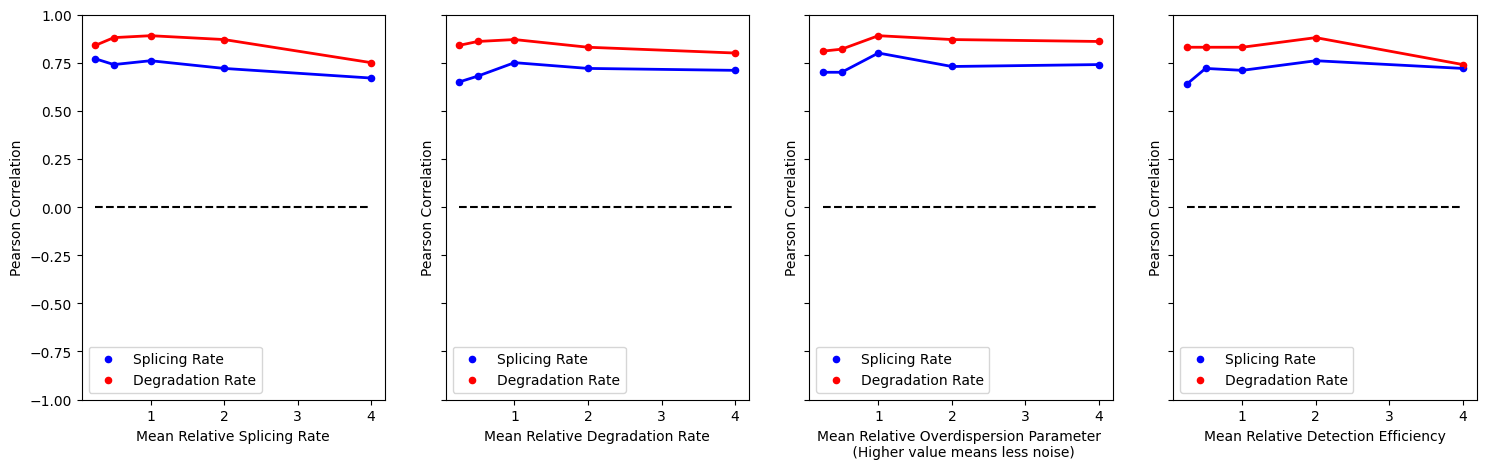

In [7]:
fig,ax = plt.subplots(1,4, figsize = (18,5), sharey = True)
ax[0].hlines(y = 0, xmin = np.min(multiplication_factor), xmax = np.max(multiplication_factor),
              linestyles = 'dashed', color = 'black')
ax[0].scatter(multiplication_factor, correlation_list1, label = 'Splicing Rate', color = 'blue',
               s = 20)
ax[0].plot(multiplication_factor, correlation_list1, color = 'blue', linewidth = 2)
ax[0].scatter(multiplication_factor, correlation_list2, label = 'Degradation Rate', color = 'red',
               s = 20)
ax[0].plot(multiplication_factor, correlation_list2, color = 'red', linewidth = 2)
ax[0].set_ylim(-1,1)
ax[0].set_ylabel('Pearson Correlation')
ax[0].set_xlabel('Mean Relative Splicing Rate')
ax[0].legend()
ax[1].hlines(y = 0, xmin = np.min(multiplication_factor), xmax = np.max(multiplication_factor),
              linestyles = 'dashed', color = 'black')
ax[1].scatter(multiplication_factor, correlation_list3, label = 'Splicing Rate', color = 'blue',
               s = 20)
ax[1].plot(multiplication_factor, correlation_list3, color = 'blue', linewidth = 2)
ax[1].scatter(multiplication_factor, correlation_list4, label = 'Degradation Rate', color = 'red',
               s = 20)
ax[1].plot(multiplication_factor, correlation_list4, color = 'red', linewidth = 2)
ax[1].set_ylim(-1,1)
ax[1].set_ylabel('Pearson Correlation')
ax[1].set_xlabel('Mean Relative Degradation Rate')
ax[1].legend()
ax[2].hlines(y = 0, xmin = np.min(multiplication_factor), xmax = np.max(multiplication_factor),
              linestyles = 'dashed', color = 'black')
ax[2].scatter(multiplication_factor, correlation_list5, label = 'Splicing Rate', color = 'blue',
               s = 20)
ax[2].plot(multiplication_factor, correlation_list5, color = 'blue', linewidth = 2)
ax[2].scatter(multiplication_factor, correlation_list6, label = 'Degradation Rate', color = 'red',
               s = 20)
ax[2].plot(multiplication_factor, correlation_list6, color = 'red', linewidth = 2)
ax[2].set_ylim(-1,1)
ax[2].set_ylabel('Pearson Correlation')
ax[2].set_xlabel('Mean Relative Overdispersion Parameter \n (Higher value means less noise)')
ax[2].legend()
ax[3].hlines(y = 0, xmin = np.min(1/multiplication_factor), xmax = np.max(1/multiplication_factor),
              linestyles = 'dashed', color = 'black')
ax[3].scatter(1/multiplication_factor, correlation_list7, label = 'Splicing Rate', color = 'blue',
               s = 20)
ax[3].plot(1/multiplication_factor, correlation_list7, color = 'blue', linewidth = 2)
ax[3].scatter(1/multiplication_factor, correlation_list8, label = 'Degradation Rate', color = 'red',
               s = 20)
ax[3].plot(1/multiplication_factor, correlation_list8, color = 'red', linewidth = 2)
ax[3].set_ylim(-1,1)
ax[3].set_ylabel('Pearson Correlation')
ax[3].set_xlabel('Mean Relative Detection Efficiency')
ax[3].legend()
plt.savefig('/nfs/team283/aa16/cell2fate_paper_results/RevisionFigures/SimulationBenchmark.pdf')